# 1- Data loading and scanning

In [1]:
import pandas as pd
import numpy as np 
from matplotlib import pyplot as plt
import seaborn as sns

In [2]:
pd.set_option('display.max_columns', None)
train = pd.read_csv('./data/train.csv')
test = pd.read_csv('./data/test.csv')
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,NaN,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,NaN,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [3]:
# Check values
print(train.shape)

(1460, 81)


In [4]:
print(train.info(verbose=True))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [5]:
train.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1379.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,567.240411,1057.429452,1162.626712,346.992466,5.844521,1515.463699,0.425342,0.057534,1.565068,0.382877,2.866438,1.046575,6.517808,0.613014,1978.506164,1.767123,472.980137,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,161.319273,441.866955,438.705324,386.587738,436.528436,48.623081,525.480383,0.518911,0.238753,0.550916,0.502885,0.815778,0.220338,1.625393,0.644666,24.689725,0.747315,213.804841,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1900.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,223.000000,795.750000,882.000000,0.000000,0.000000,1129.500000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1961.000000,1.000000,334.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,477.500000,991.500000,1087.000000,0.000000,0.000000,1464.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,1980.000000,2.000000,480.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,0.000000,808.000000,1298.250000,1391.250000,728.000000,0.000000,1776.750000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2002.000000,2.000000,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,2336.000000,6110.000000,4692.000000,2065.000000,572.000000,5642.000000,3.000000,2.000000,3.000000,2.000000,8.000000,3.000000,14.000000,3.000000,2010.000000,4.000000,1418.000000,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [6]:
missing_values = train.isna().sum().sort_values(ascending=False)

print(missing_values[missing_values>0])

PoolQC          1453
MiscFeature     1406
Alley           1369
Fence           1179
MasVnrType       872
FireplaceQu      690
LotFrontage      259
GarageYrBlt       81
GarageCond        81
GarageType        81
GarageFinish      81
GarageQual        81
BsmtFinType2      38
BsmtExposure      38
BsmtQual          37
BsmtCond          37
BsmtFinType1      37
MasVnrArea         8
Electrical         1
dtype: int64


In [7]:
missing_values = missing_values[missing_values > 0.35 * len(train)]
missing_values

PoolQC         1453
MiscFeature    1406
Alley          1369
Fence          1179
MasVnrType      872
FireplaceQu     690
dtype: int64

In the data description, the categories PoolQC, MiscFeature, Alley, Fence, MasVnrType, FireplaceQu in which there are variables type Nan is because they do not contain these properties (quality pool or fence), so we will fill them with the word 'None'.

In [8]:
for col in train.select_dtypes(include='object').columns:
    train[col] = train[col].fillna('None')  # fill missing values with 'None'
    #do the same for test data
    if col in test.columns:
        test[col] = test[col].fillna('None')

The same for numerical columns

In [9]:
for col in train.select_dtypes(include=['int64', 'float64']).columns:
    train[col] = train[col].fillna(train[col].mean())  # fill missing values with mean
    #do the same for test data
    if col in test.columns:
        test[col] = test[col].fillna(train[col].mean())

In [10]:
missing_values = train.isna().sum().sort_values(ascending=False)

print(missing_values[missing_values>0])

Series([], dtype: int64)


Imputed null data ✅ 

Now we will review what columns we have with object type and how we will deal with them further on

In [11]:
object_columns = train.select_dtypes(include='object').columns

object_columns

Index(['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature',
       'SaleType', 'SaleCondition'],
      dtype='object')

# 2- Study of the target variable

SalePrice vs lot area

<Axes: xlabel='LotArea', ylabel='SalePrice'>

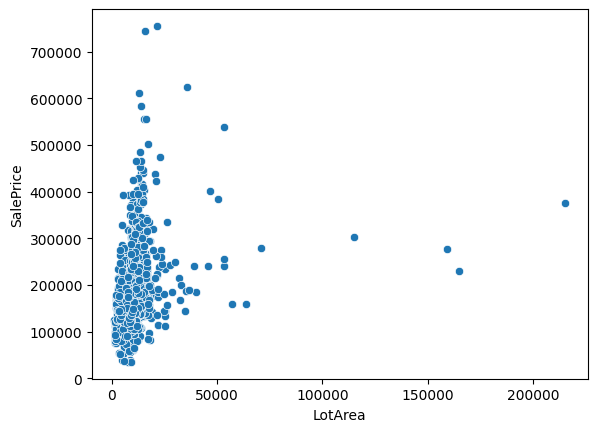

In [12]:
sns.scatterplot(x = "LotArea", y = "SalePrice", data = train)

SalePrice vs overall qualyfication

<Axes: xlabel='OverallQual', ylabel='SalePrice'>

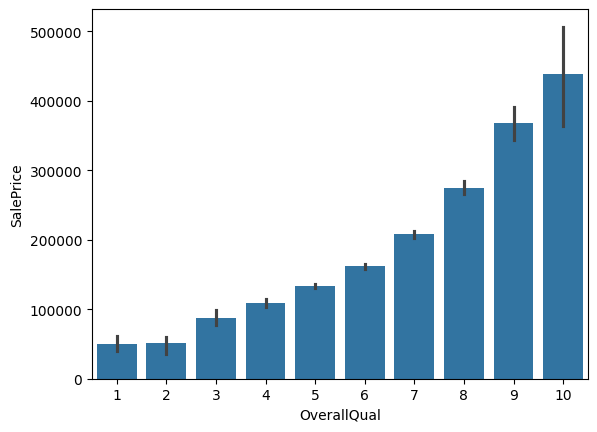

In [13]:
sns.barplot(x = "OverallQual", y = "SalePrice", data = train)

SalePrice vs GrLivArea 

<Axes: xlabel='GrLivArea', ylabel='SalePrice'>

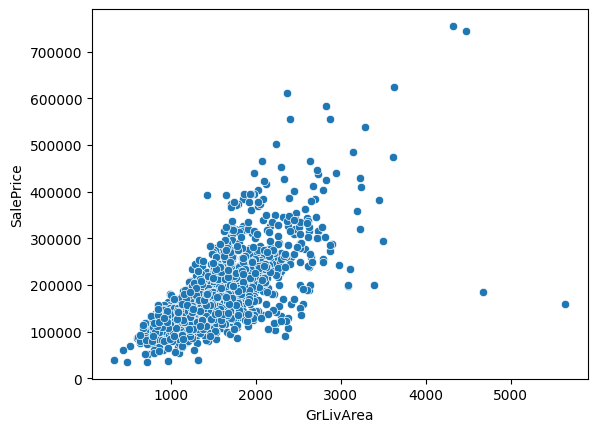

In [14]:
sns.scatterplot(x = "GrLivArea", y = "SalePrice", data = train)

SalePrice vs YearBuilt

<Axes: xlabel='YearBuilt', ylabel='SalePrice'>

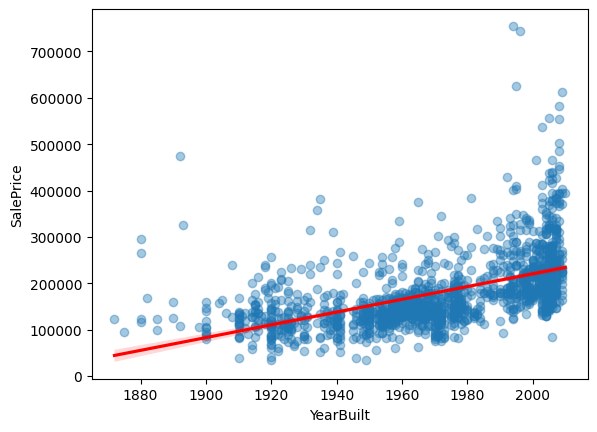

In [15]:
sns.regplot(x='YearBuilt', y='SalePrice', data=train, scatter_kws={'alpha':0.4}, line_kws={'color': 'red'})

As we observe, the strongest relationships are between house rating and living space.

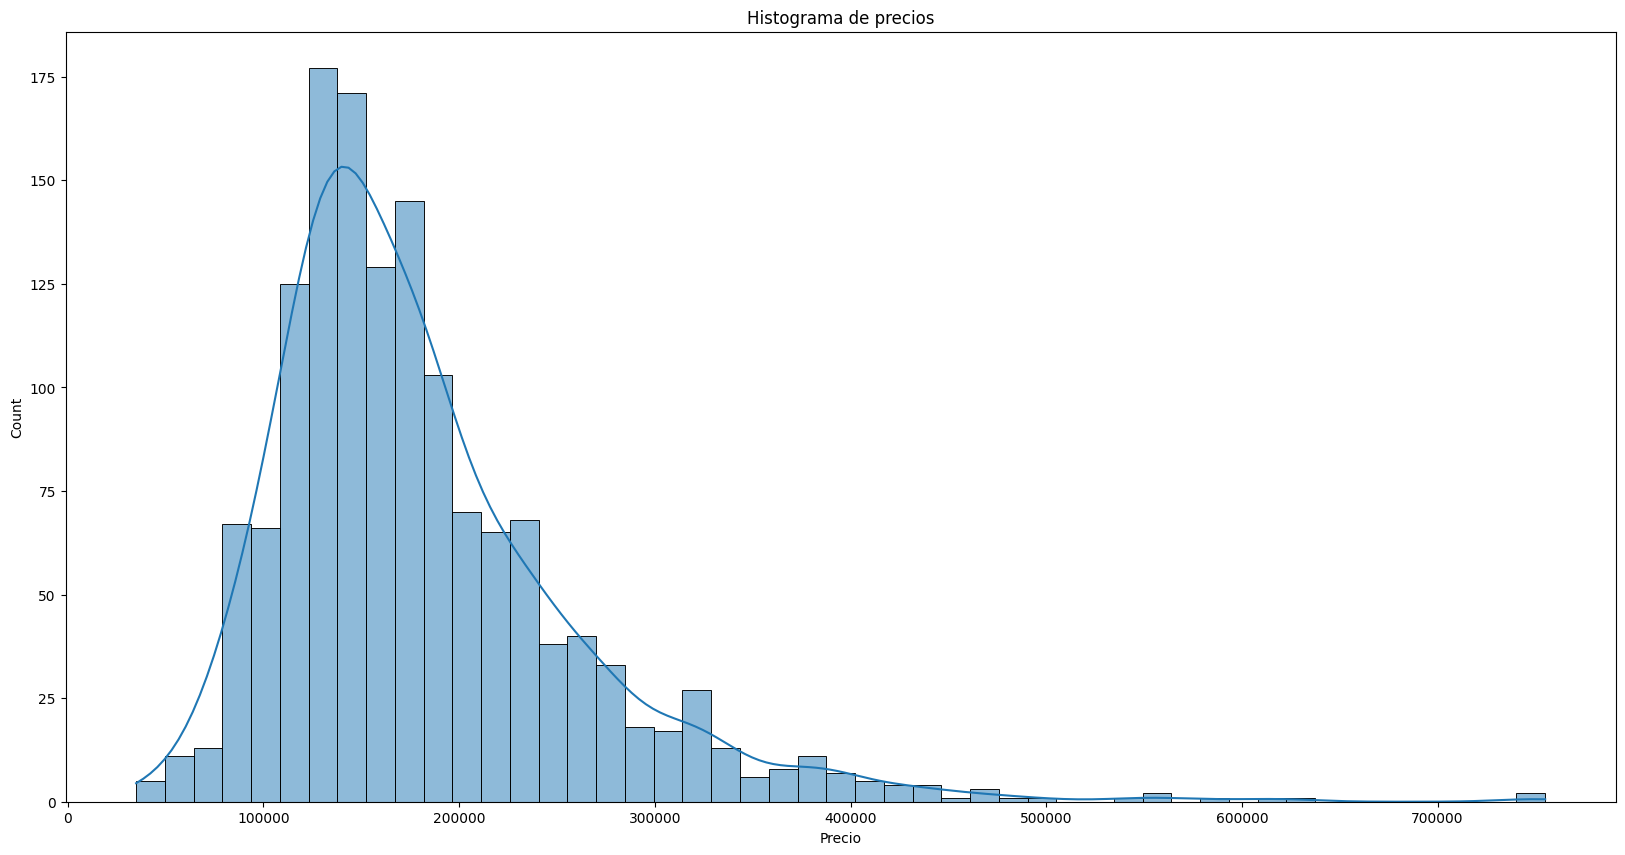

In [16]:
ax = sns.histplot(data=train, x='SalePrice', kde=True)#definir el histograma
ax.figure.set_size_inches(20, 10)#Tamano
ax.set_title('Histograma de precios')
ax.set_xlabel('Precio');

we have a distribution skewed to the left, which is sensitive in linear regression models to predict high values, so we will transform this curve to achieve a normal distribution.

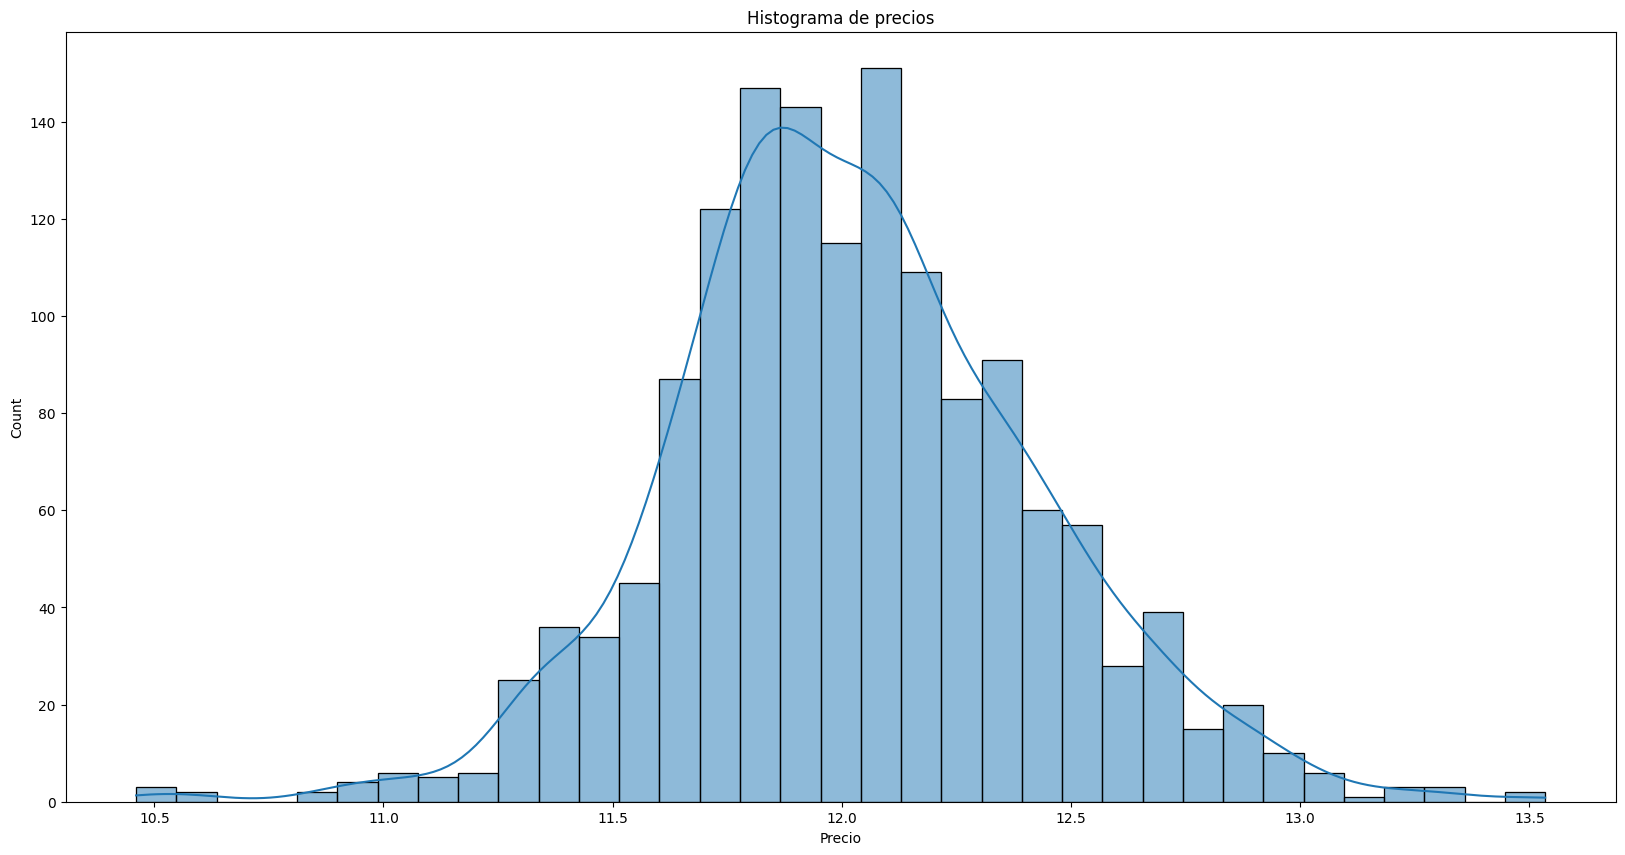

In [17]:
train['SalePrice'] = np.log1p(train['SalePrice'])

ax = sns.histplot(data=train, x='SalePrice', kde=True)#definir el histograma
ax.figure.set_size_inches(20, 10)#Tamano
ax.set_title('Histograma de precios')
ax.set_xlabel('Precio');

# 3- Pre-processing and processing

In [18]:
#We will choose the most important variables and transform the necessary ones.
#At the same time we will divide the data in nominal and ordinal variables.
object_columns

Index(['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature',
       'SaleType', 'SaleCondition'],
      dtype='object')

In [19]:
Nominal_mCategories = ['MSZoning', 'Alley', 'LotConfig', 'Neighborhood', 'BldgType', 'HouseStyle', 'Foundation', 'Heating', 'Electrical', 'MiscFeature', 'SaleType', 'SaleCondition']
Nominal = ['Street', 'CentralAir']
Ordinal = ['LotShape', 'Utilities', 'ExterQual', 'ExterCond',  'BsmtQual', 'BsmtCond', 'KitchenQual', 'Functional', 'GarageType', 'GarageQual', 'GarageCond', 'PoolQC', 'Fence']

Select numbered columns

In [20]:
train.select_dtypes(include=['int64','float64']).columns

Index(['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd',
       'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF',
       'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea',
       'MiscVal', 'MoSold', 'YrSold', 'SalePrice'],
      dtype='object')

In [21]:
train.drop(columns=['MSSubClass', 'MasVnrArea', 'KitchenAbvGr', 'Fireplaces'])

,Id,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenQual,TotRmsAbvGrd,Functional,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,RL,65.0,8450,Pave,None,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,Gd,8,Typ,None,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,None,None,None,0,2,2008,WD,Normal,12.247699
1,2,RL,80.0,9600,Pave,None,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,TA,6,Typ,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,None,None,None,0,5,2007,WD,Normal,12.109016
2,3,RL,68.0,11250,Pave,None,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,Gd,6,Typ,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,None,None,None,0,9,2008,WD,Normal,12.317171
3,4,RL,60.0,9550,Pave,None,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,Gd,7,Typ,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,None,None,None,0,2,2006,WD,Abnorml,11.849405
4,5,RL,84.0,14260,Pave,None,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,Gd,9,Typ,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,None,None,None,0,12,2008,WD,Normal,12.429220
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,RL,62.0,7917,Pave,None,Reg,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,5,1999,2000,Gable,CompShg,VinylSd,VinylSd,None,TA,TA,PConc,Gd,TA,No,Unf,0,Unf,0,953,953,GasA,Ex,Y,SBrkr,953,694,0,1647,0,0,2,1,3,TA,7,Typ,TA,Attchd,1999.0,RFn,2,460,TA,TA,Y,0,40,0,0,0,0,None,None,None,0,8,2007,WD,Normal,12.072547
1456,1457,RL,85.0,13175,Pave,None,Reg,Lvl,AllPub,Inside,Gtl,NWAmes,Norm,Norm,1Fam,1Story,6,6,1978,1988,Gable,CompShg,Plywood,Plywood,Stone,TA,TA,CBlock,Gd,TA,No,ALQ,790,Rec,163,589,1542,GasA,TA,Y,SBrkr,2073,0,0,2073,1,0,2,0,3,TA,7,Min1,TA,Attchd,1978.0,Unf,2,500,TA,TA,Y,349,0,0,0,0,0,None,MnPrv,None,0,2,2010,WD,Normal,12.254868
1457,1458,RL,66.0,9042,Pave,None,Reg,Lvl,AllPub,Inside,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,9,1941,2006,Gable,CompShg,CemntBd,CmentBd,None,Ex,Gd,Stone,TA,Gd,No,GLQ,275,Unf,0,877,1152,GasA,Ex,Y,SBrkr,1188,1152,0,2340,0,0,2,0,4,Gd,9,Typ,Gd,Attchd,1941.0,RFn,1,252,TA,TA,Y,0,60,0,0,0,0,None,GdPrv,Shed,2500,5,2010,WD,Normal,12.493133
1458,1459,RL,68.0,9717,Pave,None,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,5,6,1950,1996,Hip,CompShg,MetalSd,MetalSd,None,TA,TA,CBlock,TA,TA,Mn,GLQ,49,Rec,1029,0,1078,GasA,Gd,Y,FuseA,1078,0,0,1078,1,0,1,0,2,Gd,5,Typ,None,Attchd,1950.0,Unf,1,240,TA,TA,Y,366,0,112,0,0,0,None,None,N

Momentary correlation matrix

In [22]:
train_numerical = train.select_dtypes(include=['int64','float64'])

train_numerical

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,1,60,65.0,8450,7,5,2003,2003,196.0,706,0,150,856,856,854,0,1710,1,0,2,1,3,1,8,0,2003.0,2,548,0,61,0,0,0,0,0,2,2008,12.247699
1,2,20,80.0,9600,6,8,1976,1976,0.0,978,0,284,1262,1262,0,0,1262,0,1,2,0,3,1,6,1,1976.0,2,460,298,0,0,0,0,0,0,5,2007,12.109016
2,3,60,68.0,11250,7,5,2001,2002,162.0,486,0,434,920,920,866,0,1786,1,0,2,1,3,1,6,1,2001.0,2,608,0,42,0,0,0,0,0,9,2008,12.317171
3,4,70,60.0,9550,7,5,1915,1970,0.0,216,0,540,756,961,756,0,1717,1,0,1,0,3,1,7,1,1998.0,3,642,0,35,272,0,0,0,0,2,2006,11.849405
4,5,60,84.0,14260,8,5,2000,2000,350.0,655,0,490,1145,1145,1053,0,2198,1,0,2,1,4,1,9,1,2000.0,3,836,192,84,0,0,0,0,0,12,2008,12.429220
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,62.0,7917,6,5,1999,2000,0.0,0,0,953,953,953,694,0,1647,0,0,2,1,3,1,7,1,1999.0,2,460,0,40,0,0,0,0,0,8,2007,12.072547
1456,1457,20,85.0,13175,6,6,1978,1988,119.0,790,163,589,1542,2073,0,0,2073,1,0,2,0,3,1,7,2,1978.0,2,500,349,0,0,0,0,0,0,2,2010,12.254868
1457,1458,70,66.0,9042,7,9,1941,2006,0.0,275,0,877,1152,1188,1152,0,2340,0,0,2,0,4,1,9,2,1941.0,1,252,0,60,0,0,0,0,2500,5,2010,12.493133
1458,1459,20,68.0,9717,5,6,1950,1996,0.0,49,1029,0,1078,1078,0,0,1078,1,0,1,0,2,1,5,0,1950.0,1,240,366,0,112,0,0,0,0,4,2010,11.864469


C:\Users\dell\AppData\Local\Temp\ipykernel_20380\3279037325.py:1: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  train_numerical.correlation = train_numerical.corr()


<Axes: >

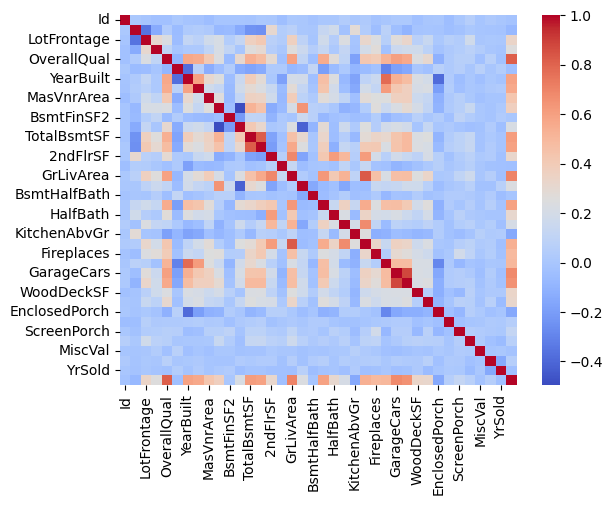

In [23]:
train_numerical.correlation = train_numerical.corr()
sns.heatmap(train_numerical.correlation, annot=False, cmap='coolwarm')

As we can see, there are several variables that are not related to SalePrice, so we will dispense with them. 

In [24]:
train_numerical.drop(columns=['Id', 'BsmtFinSF2', 'MSSubClass','MoSold','LowQualFinSF','BsmtUnfSF', 'BsmtHalfBath', 'KitchenAbvGr', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'MiscVal'], inplace=True)

<Axes: >

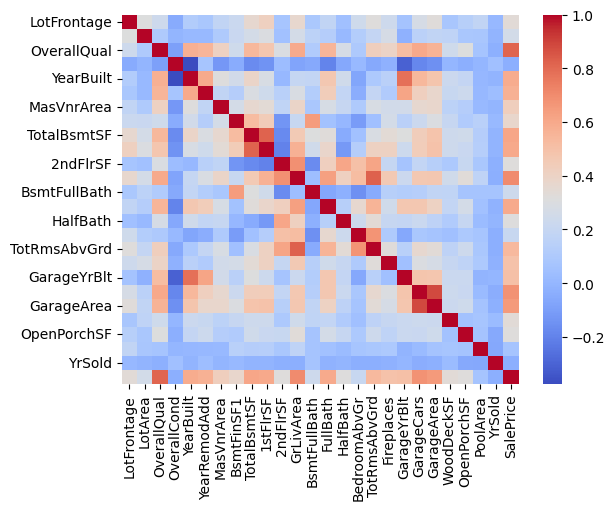

In [25]:
train_numerical.correlation = train_numerical.corr()
sns.heatmap(train_numerical.correlation, annot=False, cmap='coolwarm')

Create variables that can establish new relationships

In [26]:
#House Age
train['HouseAge'] = train['YrSold'] - train['YearBuilt']
test['HouseAge'] = test['YrSold'] - test['YearBuilt']
#total Porch
train['TotalPorch'] = train['OpenPorchSF'] + train['EnclosedPorch'] + train['3SsnPorch'] + train['ScreenPorch']
test['TotalPorch'] = test['OpenPorchSF'] + test['EnclosedPorch'] + test['3SsnPorch'] + test['ScreenPorch']
#total Bathrooms
train['TotalBathrooms'] = train['FullBath'] + (train['HalfBath'] *0.5)
test['TotalBathrooms'] = test['FullBath'] + (test['HalfBath'] *0.5)

train.sample()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,HouseAge,TotalPorch,TotalBathrooms
238,239,20,RL,93.0,12030,Pave,None,Reg,Lvl,AllPub,Inside,Gtl,NridgHt,Norm,Norm,1Fam,1Story,8,5,2007,2007,Hip,CompShg,VinylSd,VinylSd,BrkFace,254.0,Ex,TA,PConc,Ex,TA,No,Unf,0,Unf,0,1694,1694,GasA,Ex,Y,SBrkr,1694,0,0,1694,0,0,2,0,3,1,Gd,7,Typ,0,None,Attchd,2007.0,Fin,3,818,TA,TA,Y,168,228,0,0,0,0,None,None,None,0,12,2007,New,Partial,12.66981,0,228,2.0


Coding of categorical features

In [27]:
from sklearn.preprocessing import OneHotEncoder
from category_encoders import TargetEncoder
train_copy = train.copy()
#Many nominal categories
te = TargetEncoder()
for col in Nominal_mCategories:
    train[col] = te.fit_transform(train[col], train['SalePrice'])

#Few nominal categories
ohe = OneHotEncoder(sparse_output=False)  
for col in Nominal:
    encoded_cols = pd.DataFrame(ohe.fit_transform(train[[col]]), columns=ohe.get_feature_names_out([col]), index=train.index)
    train = pd.concat([train.drop(columns=[col]), encoded_cols], axis=1)

train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,HouseAge,TotalPorch,TotalBathrooms,Street_Grvl,Street_Pave,CentralAir_N,CentralAir_Y
0,1,60,12.085891,65.0,8450,12.037682,Reg,Lvl,AllPub,12.001906,Gtl,12.163646,Norm,Norm,12.047519,12.182692,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,12.261670,Gd,TA,No,GLQ,706,Unf,0,150,856,12.032084,Ex,12.06147,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,None,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,None,None,12.030119,0,2,2008,11.991068,12.005040,12.247699,5,61,2.5,0.0,1.0,0.0,1.0
1,2,20,12.085891,80.0,9600,12.037682,Reg,Lvl,AllPub,12.034074,Gtl,12.116589,Feedr,Norm,12.047519,11.993690,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,11.870087,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,12.032084,Ex,12.06147,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,None,None,12.030119,0,5,2007,11.991068,12.005040,12.109016,31,0,2.0,0.0,1.0,0.0,1.0
2,3,60,12.085891,68.0,11250,12.037682,IR1,Lvl,AllPub,12.001906,Gtl,12.163646,Norm,Norm,12.047519,12.182692,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,12.261670,Gd,TA,Mn,GLQ,486,Unf,0,434,920,12.032084,Ex,12.06147,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,None,None,12.030119,0,9,2008,11.991068,12.005040,12.317171,7,42,2.5,0.0,1.0,0.0,1.0
3,4,70,12.085891,60.0,9550,12.037682,IR1,Lvl,AllPub,12.027452,Gtl,12.198792,Norm,Norm,12.047519,12.182692,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,11.722537,TA,Gd,No,ALQ,216,Unf,0,540,756,12.032084,Gd,12.06147,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,None,None,12.030119,0,2,2006,11.991068,11.788854,11.849405,91,307,1.0,0.0,1.0,0.0,1.0
4,5,60,12.085891,84.0,14260,12.037682,IR1,Lvl,AllPub,12.034074,Gtl,12.604878,Norm,Norm,12.047519,12.182692,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,12.261670,Gd,TA,Av,GLQ,655,Unf,0,490,1145,12.032084,Ex,12.06147,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,None,None,12.030119,0,12,2008,11.991068,12.005040,12.429220,8,84,2.5,0.0,1.0,0.0,1.0


Manual coding for ordinal data.

In [28]:
#Ordinal categories
Ordinal

['LotShape',
 'Utilities',
 'ExterQual',
 'ExterCond',
 'BsmtQual',
 'BsmtCond',
 'KitchenQual',
 'Functional',
 'GarageType',
 'GarageQual',
 'GarageCond',
 'PoolQC',
 'Fence']

In [29]:
ordinal_mappings = {
    'ExterQual': {'Po': 0, 'Fa': 1, 'TA': 2, 'Gd': 3, 'Ex': 4},
    'ExterCond': {'Po': 0, 'Fa': 1, 'TA': 2, 'Gd': 3, 'Ex': 4},
    'BsmtQual': {'None': 0, 'Po': 1, 'Fa': 2, 'TA': 3, 'Gd': 4, 'Ex': 5},
    'BsmtCond': {'None': 0, 'Po': 1, 'Fa': 2, 'TA': 3, 'Gd': 4, 'Ex': 5},
    'KitchenQual': {'Po': 0, 'Fa': 1, 'TA': 2, 'Gd': 3, 'Ex': 4},
    'Functional': {'Sal': 0, 'Sev': 1, 'Maj2': 2, 'Maj1': 3, 'Mod': 4, 'Min2': 5, 'Min1': 6, 'Typ': 7},
    'GarageQual': {'None': 0, 'Po': 1, 'Fa': 2, 'TA': 3, 'Gd': 4, 'Ex': 5},
    'GarageCond': {'None': 0, 'Po': 1, 'Fa': 2, 'TA': 3, 'Gd': 4, 'Ex': 5},
    'PoolQC': {'None': 0, 'Fa': 1, 'TA': 2, 'Gd': 3, 'Ex': 4},
    'Fence': {'None': 0, 'MnWw': 1, 'GdWo': 2, 'MnPrv': 3, 'GdPrv': 4},
    'GarageType': {'None': 0, 'Detchd': 1, 'CarPort': 2, 'BuiltIn': 3, 'Basment': 4, 'Attchd': 5, '2Types': 6},
    'LotShape': {'Reg': 0, 'IR1': 1, 'IR2': 2, 'IR3': 3},
    'Utilities': {'AllPub': 0, 'NoSewr': 1, 'NoSeWa': 2, 'ELO': 3},
    'GarageType' : {'None': 0, 'Detchd': 1, 'CarPort': 2, 'BuiltIn': 3, 'Basment': 4, 'Attchd': 5, '2Types': 6}
}

In [30]:
for col, mapping in ordinal_mappings.items():
    train[col] = train[col].map(mapping).astype(int)
    
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,HouseAge,TotalPorch,TotalBathrooms,Street_Grvl,Street_Pave,CentralAir_N,CentralAir_Y
0,1,60,12.085891,65.0,8450,12.037682,0,Lvl,0,12.001906,Gtl,12.163646,Norm,Norm,12.047519,12.182692,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,3,2,12.261670,4,3,No,GLQ,706,Unf,0,150,856,12.032084,Ex,12.06147,856,854,0,1710,1,0,2,1,3,1,3,8,7,0,None,5,2003.0,RFn,2,548,3,3,Y,0,61,0,0,0,0,0,0,12.030119,0,2,2008,11.991068,12.005040,12.247699,5,61,2.5,0.0,1.0,0.0,1.0
1,2,20,12.085891,80.0,9600,12.037682,0,Lvl,0,12.034074,Gtl,12.116589,Feedr,Norm,12.047519,11.993690,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,2,2,11.870087,4,3,Gd,ALQ,978,Unf,0,284,1262,12.032084,Ex,12.06147,1262,0,0,1262,0,1,2,0,3,1,2,6,7,1,TA,5,1976.0,RFn,2,460,3,3,Y,298,0,0,0,0,0,0,0,12.030119,0,5,2007,11.991068,12.005040,12.109016,31,0,2.0,0.0,1.0,0.0,1.0
2,3,60,12.085891,68.0,11250,12.037682,1,Lvl,0,12.001906,Gtl,12.163646,Norm,Norm,12.047519,12.182692,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,3,2,12.261670,4,3,Mn,GLQ,486,Unf,0,434,920,12.032084,Ex,12.06147,920,866,0,1786,1,0,2,1,3,1,3,6,7,1,TA,5,2001.0,RFn,2,608,3,3,Y,0,42,0,0,0,0,0,0,12.030119,0,9,2008,11.991068,12.005040,12.317171,7,42,2.5,0.0,1.0,0.0,1.0
3,4,70,12.085891,60.0,9550,12.037682,1,Lvl,0,12.027452,Gtl,12.198792,Norm,Norm,12.047519,12.182692,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,2,2,11.722537,3,4,No,ALQ,216,Unf,0,540,756,12.032084,Gd,12.06147,961,756,0,1717,1,0,1,0,3,1,3,7,7,1,Gd,1,1998.0,Unf,3,642,3,3,Y,0,35,272,0,0,0,0,0,12.030119,0,2,2006,11.991068,11.788854,11.849405,91,307,1.0,0.0,1.0,0.0,1.0
4,5,60,12.085891,84.0,14260,12.037682,1,Lvl,0,12.034074,Gtl,12.604878,Norm,Norm,12.047519,12.182692,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,3,2,12.261670,4,3,Av,GLQ,655,Unf,0,490,1145,12.032084,Ex,12.06147,1145,1053,0,2198,1,0,2,1,4,1,3,9,7,1,TA,5,2000.0,RFn,3,836,3,3,Y,192,84,0,0,0,0,0,0,12.030119,0,12,2008,11.991068,12.005040,12.429220,8,84,2.5,0.0,1.0,0.0,1.0


Now delete de extra columns

In [31]:
train.select_dtypes(include='object').columns

Index(['LandContour', 'LandSlope', 'Condition1', 'Condition2', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'BsmtExposure',
       'BsmtFinType1', 'BsmtFinType2', 'HeatingQC', 'FireplaceQu',
       'GarageFinish', 'PavedDrive'],
      dtype='object')

In [32]:
train.drop(columns=['LandSlope', 'Condition1', 'Condition2', 'RoofStyle', 'RoofMatl',
       'Exterior1st', 'Exterior2nd', 'MasVnrType', 'BsmtExposure',
       'BsmtFinType1', 'BsmtFinType2', 'HeatingQC', 'FireplaceQu',
       'GarageFinish', 'PavedDrive', 'LandContour'], inplace=True)
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 70 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Id              1460 non-null   int64  
 1   MSSubClass      1460 non-null   int64  
 2   MSZoning        1460 non-null   float64
 3   LotFrontage     1460 non-null   float64
 4   LotArea         1460 non-null   int64  
 5   Alley           1460 non-null   float64
 6   LotShape        1460 non-null   int32  
 7   Utilities       1460 non-null   int32  
 8   LotConfig       1460 non-null   float64
 9   Neighborhood    1460 non-null   float64
 10  BldgType        1460 non-null   float64
 11  HouseStyle      1460 non-null   float64
 12  OverallQual     1460 non-null   int64  
 13  OverallCond     1460 non-null   int64  
 14  YearBuilt       1460 non-null   int64  
 15  YearRemodAdd    1460 non-null   int64  
 16  MasVnrArea      1460 non-null   float64
 17  ExterQual       1460 non-null   i

We will create another hotmap to visualize how the correlations are 

<Axes: >

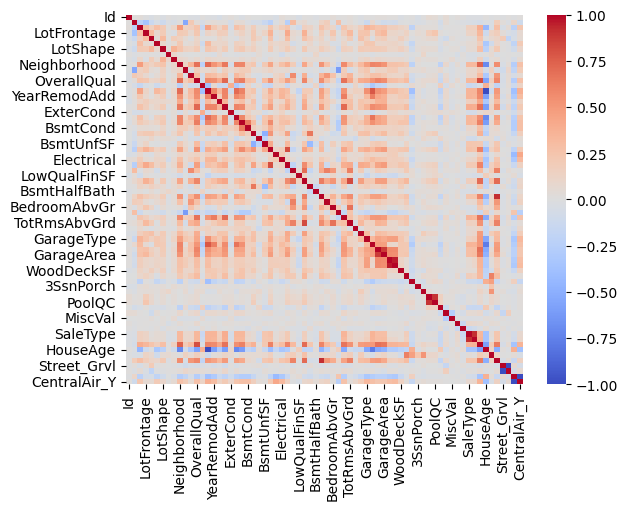

In [33]:
train_corr = train.corr()
sns.heatmap(train_corr, annot=False, cmap='coolwarm')

# 4- Training and evaluation of the model

In [34]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

#Target
y = train['SalePrice']
X = train.drop(columns=['Id', 'SalePrice'])
X_test = test.drop(["Id"], axis=1)
#Train test split
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

#Models Preparation
lr = LinearRegression()
rf = RandomForestRegressor(n_estimators=50, max_depth=5 ,random_state=42)

#Models info

models = {
    'Linear Regression': lr,
    'Random Forest': rf
}

#Train Models

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_val)
    mse = mean_squared_error(y_val, y_pred)
    r2 = r2_score(y_val, y_pred)
    print(f"{name}: MSE = {mse:.2f}, R2 = {r2:.2f}")

Linear Regression: MSE = 0.02, R2 = 0.90
Random Forest: MSE = 0.03, R2 = 0.86


r2 0.90 omg

# 5- Final Prediction

In [35]:
X_test 

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,HouseAge,TotalPorch,TotalBathrooms
0,20,RH,80.0,11622,Pave,None,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Feedr,Norm,1Fam,1Story,5,6,1961,1961,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,CBlock,TA,TA,No,Rec,468.0,LwQ,144.0,270.0,882.0,GasA,TA,Y,SBrkr,896,0,0,896,0.0,0.0,1,0,2,1,TA,5,Typ,0,None,Attchd,1961.000000,Unf,1.0,730.0,TA,TA,Y,140,0,0,0,120,0,None,MnPrv,None,0,6,2010,WD,Normal,49,120,1.0
1,20,RL,81.0,14267,Pave,None,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,6,1958,1958,Hip,CompShg,Wd Sdng,Wd Sdng,BrkFace,108.0,TA,TA,CBlock,TA,TA,No,ALQ,923.0,Unf,0.0,406.0,1329.0,GasA,TA,Y,SBrkr,1329,0,0,1329,0.0,0.0,1,1,3,1,Gd,6,Typ,0,None,Attchd,1958.000000,Unf,1.0,312.0,TA,TA,Y,393,36,0,0,0,0,None,None,Gar2,12500,6,2010,WD,Normal,52,36,1.5
2,60,RL,74.0,13830,Pave,None,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,5,5,1997,1998,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,GLQ,791.0,Unf,0.0,137.0,928.0,GasA,Gd,Y,SBrkr,928,701,0,1629,0.0,0.0,2,1,3,1,TA,6,Typ,1,TA,Attchd,1997.000000,Fin,2.0,482.0,TA,TA,Y,212,34,0,0,0,0,None,MnPrv,None,0,3,2010,WD,Normal,13,34,2.5
3,60,RL,78.0,9978,Pave,None,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,6,1998,1998,Gable,CompShg,VinylSd,VinylSd,BrkFace,20.0,TA,TA,PConc,TA,TA,No,GLQ,602.0,Unf,0.0,324.0,926.0,GasA,Ex,Y,SBrkr,926,678,0,1604,0.0,0.0,2,1,3,1,Gd,7,Typ,1,Gd,Attchd,1998.000000,Fin,2.0,470.0,TA,TA,Y,360,36,0,0,0,0,None,None,None,0,6,2010,WD,Normal,12,36,2.5
4,120,RL,43.0,5005,Pave,None,IR1,HLS,AllPub,Inside,Gtl,StoneBr,Norm,Norm,TwnhsE,1Story,8,5,1992,1992,Gable,CompShg,HdBoard,HdBoard,None,0.0,Gd,TA,PConc,Gd,TA,No,ALQ,263.0,Unf,0.0,1017.0,1280.0,GasA,Ex,Y,SBrkr,1280,0,0,1280,0.0,0.0,2,0,2,1,Gd,5,Typ,0,None,Attchd,1992.000000,RFn,2.0,506.0,TA,TA,Y,0,82,0,0,144,0,None,None,None,0,1,2010,WD,Normal,18,226,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,160,RM,21.0,1936,Pave,None,Reg,Lvl,AllPub,Inside,Gtl,MeadowV,Norm,Norm,Twnhs,2Story,4,7,1970,1970,Gable,CompShg,CemntBd,CmentBd,None,0.0,TA,TA,CBlock,TA,TA,No,Unf,0.0,Unf,0.0,546.0,546.0,GasA,Gd,Y,SBrkr,546,546,0,1092,0.0,0.0,1,1,3,1,TA,5,Typ,0,None,None,1978.506164,None,0.0,0.0,None,None,Y,0,0,0,0,0,0,None,None,None,0,6,2006,WD,Normal,36,0,1.5
1455,160,RM,21.0,1894,Pave,None,Reg,Lvl,AllPub,Inside,Gtl,MeadowV,Norm,Norm,TwnhsE,2Story,4,5,1970,1970,Gable,CompShg,CemntBd,CmentBd,None,0.0,TA,TA,CBlock,TA,TA,No,Rec,252.0,Unf,0.0,294.0,546.0,GasA,TA,Y,SBrkr,546,546,0,1092,0.0,0.0,1,1,3,1,TA,6,Typ,0,None,CarPort,1970.000000,Unf,1.0,286.0,TA,TA,Y,0,24,0,0,0,0,None,None,None,0,4,2006,WD,Abnorml,36,24,1.5
1456,20,RL,160.0,20000,Pave,None,Reg,Lvl,AllPub,Inside,Gtl,Mitchel,Norm,Norm,1Fam,1Story,5,7,1960,1996,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,CBlock,TA,TA,No,ALQ,1224.0,Unf,0.0,0.0,1224.0,GasA,Ex,Y,SBrkr,1224,0,0,1224,1.0,0.0,1,0,4,1,TA,7,Typ,1,TA,Detchd,1960.000000,Unf,2.0,576.0,TA,TA,Y,474,0,0,0,0,0

In [36]:
X_test.drop(columns=['MSSubClass', 'MasVnrArea', 'KitchenAbvGr', 'Fireplaces'])

,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenQual,TotRmsAbvGrd,Functional,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,HouseAge,TotalPorch,TotalBathrooms
0,RH,80.0,11622,Pave,None,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Feedr,Norm,1Fam,1Story,5,6,1961,1961,Gable,CompShg,VinylSd,VinylSd,None,TA,TA,CBlock,TA,TA,No,Rec,468.0,LwQ,144.0,270.0,882.0,GasA,TA,Y,SBrkr,896,0,0,896,0.0,0.0,1,0,2,TA,5,Typ,None,Attchd,1961.000000,Unf,1.0,730.0,TA,TA,Y,140,0,0,0,120,0,None,MnPrv,None,0,6,2010,WD,Normal,49,120,1.0
1,RL,81.0,14267,Pave,None,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,6,1958,1958,Hip,CompShg,Wd Sdng,Wd Sdng,BrkFace,TA,TA,CBlock,TA,TA,No,ALQ,923.0,Unf,0.0,406.0,1329.0,GasA,TA,Y,SBrkr,1329,0,0,1329,0.0,0.0,1,1,3,Gd,6,Typ,None,Attchd,1958.000000,Unf,1.0,312.0,TA,TA,Y,393,36,0,0,0,0,None,None,Gar2,12500,6,2010,WD,Normal,52,36,1.5
2,RL,74.0,13830,Pave,None,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,5,5,1997,1998,Gable,CompShg,VinylSd,VinylSd,None,TA,TA,PConc,Gd,TA,No,GLQ,791.0,Unf,0.0,137.0,928.0,GasA,Gd,Y,SBrkr,928,701,0,1629,0.0,0.0,2,1,3,TA,6,Typ,TA,Attchd,1997.000000,Fin,2.0,482.0,TA,TA,Y,212,34,0,0,0,0,None,MnPrv,None,0,3,2010,WD,Normal,13,34,2.5
3,RL,78.0,9978,Pave,None,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,6,1998,1998,Gable,CompShg,VinylSd,VinylSd,BrkFace,TA,TA,PConc,TA,TA,No,GLQ,602.0,Unf,0.0,324.0,926.0,GasA,Ex,Y,SBrkr,926,678,0,1604,0.0,0.0,2,1,3,Gd,7,Typ,Gd,Attchd,1998.000000,Fin,2.0,470.0,TA,TA,Y,360,36,0,0,0,0,None,None,None,0,6,2010,WD,Normal,12,36,2.5
4,RL,43.0,5005,Pave,None,IR1,HLS,AllPub,Inside,Gtl,StoneBr,Norm,Norm,TwnhsE,1Story,8,5,1992,1992,Gable,CompShg,HdBoard,HdBoard,None,Gd,TA,PConc,Gd,TA,No,ALQ,263.0,Unf,0.0,1017.0,1280.0,GasA,Ex,Y,SBrkr,1280,0,0,1280,0.0,0.0,2,0,2,Gd,5,Typ,None,Attchd,1992.000000,RFn,2.0,506.0,TA,TA,Y,0,82,0,0,144,0,None,None,None,0,1,2010,WD,Normal,18,226,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,RM,21.0,1936,Pave,None,Reg,Lvl,AllPub,Inside,Gtl,MeadowV,Norm,Norm,Twnhs,2Story,4,7,1970,1970,Gable,CompShg,CemntBd,CmentBd,None,TA,TA,CBlock,TA,TA,No,Unf,0.0,Unf,0.0,546.0,546.0,GasA,Gd,Y,SBrkr,546,546,0,1092,0.0,0.0,1,1,3,TA,5,Typ,None,None,1978.506164,None,0.0,0.0,None,None,Y,0,0,0,0,0,0,None,None,None,0,6,2006,WD,Normal,36,0,1.5
1455,RM,21.0,1894,Pave,None,Reg,Lvl,AllPub,Inside,Gtl,MeadowV,Norm,Norm,TwnhsE,2Story,4,5,1970,1970,Gable,CompShg,CemntBd,CmentBd,None,TA,TA,CBlock,TA,TA,No,Rec,252.0,Unf,0.0,294.0,546.0,GasA,TA,Y,SBrkr,546,546,0,1092,0.0,0.0,1,1,3,TA,6,Typ,None,CarPort,1970.000000,Unf,1.0,286.0,TA,TA,Y,0,24,0,0,0,0,None,None,None,0,4,2006,WD,Abnorml,36,24,1.5
1456,RL,160.0,20000,Pave,None,Reg,Lvl,AllPub,Inside,Gtl,Mitchel,Norm,Norm,1Fam,1Story,5,7,1960,1996,Gable,CompShg,VinylSd,VinylSd,None,TA,TA,CBlock,TA,TA,No,ALQ,1224.0,Unf,0.0,0.0,1224.0,GasA,Ex,Y,SBrkr,1224,0,0,1224,1.0,0.0,1,0,4,TA,7,Typ,TA,Detchd,1960.000000,Unf,2.0,576.0,TA,TA,Y,474,0,0,0,0,0,None,None,None,0,9,2006,WD,Abnorml,46,0,1.0
1457,RL,62.0,10441,Pave,None,Reg,Lvl,AllPub,Inside,Gtl,Mitchel,Norm,Norm,1Fam,SFoyer,5,5,1992,1992,Gable,CompSh

In [37]:
#Prepare test data

#Many nominal categories
te = TargetEncoder()
for col in Nominal_mCategories:
    train[col] = te.fit_transform(train_copy[col], train_copy['SalePrice'])#Train te
    X_test[col] = te.transform(X_test[col])#Transform data

#Few nominal categories
ohe = OneHotEncoder(sparse_output=False)  
for col in Nominal:
    encoded_cols = pd.DataFrame(ohe.fit_transform(train_copy[[col]]), columns=ohe.get_feature_names_out([col]), index=train_copy.index)#Train ohe
    train_copy = pd.concat([train_copy.drop(columns=[col]), encoded_cols], axis=1)
    test_encoded_cols = pd.DataFrame(ohe.transform(X_test[[col]]), columns=ohe.get_feature_names_out([col]), index=X_test.index)
    X_test = pd.concat([X_test.drop(columns=[col]), test_encoded_cols], axis=1)#Transform ohe

X_test.head()


,MSSubClass,MSZoning,LotFrontage,LotArea,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,HouseAge,TotalPorch,TotalBathrooms,Street_Grvl,Street_Pave,CentralAir_N,CentralAir_Y
0,20,11.914014,80.0,11622,12.037682,Reg,Lvl,AllPub,12.001906,Gtl,11.868052,Feedr,Norm,12.047519,11.993690,5,6,1961,1961,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,11.870087,TA,TA,No,Rec,468.0,LwQ,144.0,270.0,882.0,12.032084,TA,12.06147,896,0,0,896,0.0,0.0,1,0,2,1,TA,5,Typ,0,None,Attchd,1961.0,Unf,1.0,730.0,TA,TA,Y,140,0,0,0,120,0,None,MnPrv,12.030119,0,6,2010,11.991068,12.00504,49,120,1.0,0.0,1.0,0.0,1.0
1,20,12.085891,81.0,14267,12.037682,IR1,Lvl,AllPub,12.027452,Gtl,11.868052,Norm,Norm,12.047519,11.993690,6,6,1958,1958,Hip,CompShg,Wd Sdng,Wd Sdng,BrkFace,108.0,TA,TA,11.870087,TA,TA,No,ALQ,923.0,Unf,0.0,406.0,1329.0,12.032084,TA,12.06147,1329,0,0,1329,0.0,0.0,1,1,3,1,Gd,6,Typ,0,None,Attchd,1958.0,Unf,1.0,312.0,TA,TA,Y,393,36,0,0,0,0,None,None,12.026541,12500,6,2010,11.991068,12.00504,52,36,1.5,0.0,1.0,0.0,1.0
2,60,12.085891,74.0,13830,12.037682,IR1,Lvl,AllPub,12.001906,Gtl,12.155449,Norm,Norm,12.047519,12.182692,5,5,1997,1998,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,12.261670,Gd,TA,No,GLQ,791.0,Unf,0.0,137.0,928.0,12.032084,Gd,12.06147,928,701,0,1629,0.0,0.0,2,1,3,1,TA,6,Typ,1,TA,Attchd,1997.0,Fin,2.0,482.0,TA,TA,Y,212,34,0,0,0,0,None,MnPrv,12.030119,0,3,2010,11.991068,12.00504,13,34,2.5,0.0,1.0,0.0,1.0
3,60,12.085891,78.0,9978,12.037682,IR1,Lvl,AllPub,12.001906,Gtl,12.155449,Norm,Norm,12.047519,12.182692,6,6,1998,1998,Gable,CompShg,VinylSd,VinylSd,BrkFace,20.0,TA,TA,12.261670,TA,TA,No,GLQ,602.0,Unf,0.0,324.0,926.0,12.032084,Ex,12.06147,926,678,0,1604,0.0,0.0,2,1,3,1,Gd,7,Typ,1,Gd,Attchd,1998.0,Fin,2.0,470.0,TA,TA,Y,360,36,0,0,0,0,None,None,12.030119,0,6,2010,11.991068,12.00504,12,36,2.5,0.0,1.0,0.0,1.0
4,120,12.085891,43.0,5005,12.037682,IR1,HLS,AllPub,12.001906,Gtl,12.373526,Norm,Norm,12.059454,11.993690,8,5,1992,1992,Gable,CompShg,HdBoard,HdBoard,None,0.0,Gd,TA,12.261670,Gd,TA,No,ALQ,263.0,Unf,0.0,1017.0,1280.0,12.032084,Ex,12.06147,1280,0,0,1280,0.0,0.0,2,0,2,1,Gd,5,Typ,0,None,Attchd,1992.0,RFn,2.0,506.0,TA,TA,Y,0,82,0,0,144,0,None,None,12.030119,0,1,2010,11.991068,12.00504,18,226,2.0,0.0,1.0,0.0,1.0


In [38]:
# Mapping for ordinal
for col, mapping in ordinal_mappings.items():
    # Manejar valores desconocidos y nulos
    X_test[col] = X_test[col].fillna('Unknown')
    X_test[col] = X_test[col].apply(lambda x: x if x in mapping else 'Unknown')
    # Mapear y asignar -1 a categorías desconocidas
    X_test[col] = X_test[col].map(mapping).fillna(-1).astype(int)

X_test.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,HouseAge,TotalPorch,TotalBathrooms,Street_Grvl,Street_Pave,CentralAir_N,CentralAir_Y
0,20,11.914014,80.0,11622,12.037682,0,Lvl,0,12.001906,Gtl,11.868052,Feedr,Norm,12.047519,11.993690,5,6,1961,1961,Gable,CompShg,VinylSd,VinylSd,None,0.0,2,2,11.870087,3,3,No,Rec,468.0,LwQ,144.0,270.0,882.0,12.032084,TA,12.06147,896,0,0,896,0.0,0.0,1,0,2,1,2,5,7,0,None,5,1961.0,Unf,1.0,730.0,3,3,Y,140,0,0,0,120,0,0,3,12.030119,0,6,2010,11.991068,12.00504,49,120,1.0,0.0,1.0,0.0,1.0
1,20,12.085891,81.0,14267,12.037682,1,Lvl,0,12.027452,Gtl,11.868052,Norm,Norm,12.047519,11.993690,6,6,1958,1958,Hip,CompShg,Wd Sdng,Wd Sdng,BrkFace,108.0,2,2,11.870087,3,3,No,ALQ,923.0,Unf,0.0,406.0,1329.0,12.032084,TA,12.06147,1329,0,0,1329,0.0,0.0,1,1,3,1,3,6,7,0,None,5,1958.0,Unf,1.0,312.0,3,3,Y,393,36,0,0,0,0,0,0,12.026541,12500,6,2010,11.991068,12.00504,52,36,1.5,0.0,1.0,0.0,1.0
2,60,12.085891,74.0,13830,12.037682,1,Lvl,0,12.001906,Gtl,12.155449,Norm,Norm,12.047519,12.182692,5,5,1997,1998,Gable,CompShg,VinylSd,VinylSd,None,0.0,2,2,12.261670,4,3,No,GLQ,791.0,Unf,0.0,137.0,928.0,12.032084,Gd,12.06147,928,701,0,1629,0.0,0.0,2,1,3,1,2,6,7,1,TA,5,1997.0,Fin,2.0,482.0,3,3,Y,212,34,0,0,0,0,0,3,12.030119,0,3,2010,11.991068,12.00504,13,34,2.5,0.0,1.0,0.0,1.0
3,60,12.085891,78.0,9978,12.037682,1,Lvl,0,12.001906,Gtl,12.155449,Norm,Norm,12.047519,12.182692,6,6,1998,1998,Gable,CompShg,VinylSd,VinylSd,BrkFace,20.0,2,2,12.261670,3,3,No,GLQ,602.0,Unf,0.0,324.0,926.0,12.032084,Ex,12.06147,926,678,0,1604,0.0,0.0,2,1,3,1,3,7,7,1,Gd,5,1998.0,Fin,2.0,470.0,3,3,Y,360,36,0,0,0,0,0,0,12.030119,0,6,2010,11.991068,12.00504,12,36,2.5,0.0,1.0,0.0,1.0
4,120,12.085891,43.0,5005,12.037682,1,HLS,0,12.001906,Gtl,12.373526,Norm,Norm,12.059454,11.993690,8,5,1992,1992,Gable,CompShg,HdBoard,HdBoard,None,0.0,3,2,12.261670,4,3,No,ALQ,263.0,Unf,0.0,1017.0,1280.0,12.032084,Ex,12.06147,1280,0,0,1280,0.0,0.0,2,0,2,1,3,5,7,0,None,5,1992.0,RFn,2.0,506.0,3,3,Y,0,82,0,0,144,0,0,0,12.030119,0,1,2010,11.991068,12.00504,18,226,2.0,0.0,1.0,0.0,1.0


In [39]:
X_test.select_dtypes(include='object').columns

Index(['LandContour', 'LandSlope', 'Condition1', 'Condition2', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'BsmtExposure',
       'BsmtFinType1', 'BsmtFinType2', 'HeatingQC', 'FireplaceQu',
       'GarageFinish', 'PavedDrive'],
      dtype='object')

In [40]:
X_test = X_test.drop(columns=['LandContour', 'LandSlope', 'Condition1', 'Condition2', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'BsmtExposure',
       'BsmtFinType1', 'BsmtFinType2', 'HeatingQC', 'FireplaceQu',
       'GarageFinish', 'PavedDrive'])
X_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 68 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   MSSubClass      1459 non-null   int64  
 1   MSZoning        1459 non-null   float64
 2   LotFrontage     1459 non-null   float64
 3   LotArea         1459 non-null   int64  
 4   Alley           1459 non-null   float64
 5   LotShape        1459 non-null   int32  
 6   Utilities       1459 non-null   int32  
 7   LotConfig       1459 non-null   float64
 8   Neighborhood    1459 non-null   float64
 9   BldgType        1459 non-null   float64
 10  HouseStyle      1459 non-null   float64
 11  OverallQual     1459 non-null   int64  
 12  OverallCond     1459 non-null   int64  
 13  YearBuilt       1459 non-null   int64  
 14  YearRemodAdd    1459 non-null   int64  
 15  MasVnrArea      1459 non-null   float64
 16  ExterQual       1459 non-null   int32  
 17  ExterCond       1459 non-null   i

In [42]:
X_test.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Alley,LotShape,Utilities,LotConfig,Neighborhood,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,GarageType,GarageYrBlt,GarageCars,GarageArea,GarageQual,GarageCond,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,HouseAge,TotalPorch,TotalBathrooms,Street_Grvl,Street_Pave,CentralAir_N,CentralAir_Y
0,20,11.914014,80.0,11622,12.037682,0,0,12.001906,11.868052,12.047519,11.993690,5,6,1961,1961,0.0,2,2,11.870087,3,3,468.0,144.0,270.0,882.0,12.032084,12.06147,896,0,0,896,0.0,0.0,1,0,2,1,2,5,7,0,5,1961.0,1.0,730.0,3,3,140,0,0,0,120,0,0,3,12.030119,0,6,2010,11.991068,12.00504,49,120,1.0,0.0,1.0,0.0,1.0
1,20,12.085891,81.0,14267,12.037682,1,0,12.027452,11.868052,12.047519,11.993690,6,6,1958,1958,108.0,2,2,11.870087,3,3,923.0,0.0,406.0,1329.0,12.032084,12.06147,1329,0,0,1329,0.0,0.0,1,1,3,1,3,6,7,0,5,1958.0,1.0,312.0,3,3,393,36,0,0,0,0,0,0,12.026541,12500,6,2010,11.991068,12.00504,52,36,1.5,0.0,1.0,0.0,1.0
2,60,12.085891,74.0,13830,12.037682,1,0,12.001906,12.155449,12.047519,12.182692,5,5,1997,1998,0.0,2,2,12.261670,4,3,791.0,0.0,137.0,928.0,12.032084,12.06147,928,701,0,1629,0.0,0.0,2,1,3,1,2,6,7,1,5,1997.0,2.0,482.0,3,3,212,34,0,0,0,0,0,3,12.030119,0,3,2010,11.991068,12.00504,13,34,2.5,0.0,1.0,0.0,1.0
3,60,12.085891,78.0,9978,12.037682,1,0,12.001906,12.155449,12.047519,12.182692,6,6,1998,1998,20.0,2,2,12.261670,3,3,602.0,0.0,324.0,926.0,12.032084,12.06147,926,678,0,1604,0.0,0.0,2,1,3,1,3,7,7,1,5,1998.0,2.0,470.0,3,3,360,36,0,0,0,0,0,0,12.030119,0,6,2010,11.991068,12.00504,12,36,2.5,0.0,1.0,0.0,1.0
4,120,12.085891,43.0,5005,12.037682,1,0,12.001906,12.373526,12.059454,11.993690,8,5,1992,1992,0.0,3,2,12.261670,4,3,263.0,0.0,1017.0,1280.0,12.032084,12.06147,1280,0,0,1280,0.0,0.0,2,0,2,1,3,5,7,0,5,1992.0,2.0,506.0,3,3,0,82,0,0,144,0,0,0,12.030119,0,1,2010,11.991068,12.00504,18,226,2.0,0.0,1.0,0.0,1.0


We already have all the test data converted and the way we needed, now we will choose the model to use for the prediction, the model that had the best score was the linear regression, but as in this case the one that evaluates is kaggle what we will do is to export two results, one with linear regression and another with Random Forest.

In [48]:
lr_pred = np.expm1(lr.predict(X_test))#Inverse log transformation (expm1)
rf_pred = np.expm1(rf.predict(X_test))

def download_output(y_pred, name):#Dataframe creation
  output = pd.DataFrame({'ID': test['Id'], #Id from the original test data
                         'SalePrice': y_pred})#Predictions
  output.to_csv(name, index=False)#Saving

In [49]:
download_output(lr_pred, 'submission_lr.csv')
download_output(rf_pred, 'submission_rf.csv')

Comparacion de los modelos

In [52]:
pd.read_csv('submission_lr.csv').head(10)


,ID,SalePrice
0,1461,117183.731835
1,1462,152447.980910
2,1463,167394.058101
3,1464,188972.837798
4,1465,195799.562265
5,1466,175193.179223
6,1467,190965.288039
7,1468,166110.582355
8,1469,198678.139852
9,1470,119291.911850


In [53]:
pd.read_csv('submission_rf.csv').head(10)

,ID,SalePrice
0,1461,126284.789128
1,1462,149622.481441
2,1463,185886.658163
3,1464,185992.949068
4,1465,210718.270495
5,1466,178291.036414
6,1467,163638.247246
7,1468,177239.251351
8,1469,187110.593445
9,1470,127429.305575
